# Matched 2 by 2 Tables
[Link to lecture](https://github.com/bcaffo/MathematicsBiostatisticsBootCamp2/blob/master/lecture11.pdf)

In [1]:
from scipy.stats import binom, chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The following 2x2 table represents the approval and disapproval in a survey conducted on the same individuals in two different times

In [2]:
table = np.array([[794, 150],
         [86, 570]])

data = pd.DataFrame({'Approved': table[:, 0], 'Disapproved': table[:, 1]}, index=['Approved', 'Disapproved'])
data.loc['Total'] = data.sum(axis=0)
data['Total'] = data.sum(axis=1)

data

,Approved,Disapproved,Total
Approved,794,150,944
Disapproved,86,570,656
Total,880,720,1600


In [3]:
# Proportions
data/1600

,Approved,Disapproved,Total
Approved,0.49625,0.09375,0.59
Disapproved,0.05375,0.35625,0.41
Total,0.55000,0.45000,1.00


## Computing a P-value using McNemar's test
* **McNemar TS**:
$$ \frac{(n_{12} - n_{21})^2}{n_{12} + n_{21}} $$

This statistic follows an asymptotic Chi-squared distribution with one degree of freedom.

In [4]:
n12 = table[0, 1]
n21 = table[1, 0]

stat = (n12-n21)**2 / (n12+n21)

stat

17.35593220338983

P-value

In [5]:
1 - chi2.cdf(stat, df=1)

3.099293441044537e-05

## Computing an exact P-value
**Alternative Hypothesis (Ha)**:
* Assumption is that the people who approved after disapproving in the first time
are less than the people who disapproved after approving the first time
So there is a tendency for people to disapprove in the second survey

**Null Hypothesis (H0):**
* Under the null hypothesis, the proportion of people that change their mind is equal, i.e., the same proportion of people changed from approve to disapprove and from disapporove to approve. Therefore, the ratio between one proportion and the sum of the proportions is 0.5 under the null hypothesis. Same goes for the number of individuals (n12/(n12+n21) = 0.5)

Thus, the number of individuals that change from approve to disapprove, under the null hypothesis,
is a binomial of n=236 (The number of individuals that changed their opinion) and p=0.5.

So the probability that we get a draw with less than 86 people approving after disapproval can be computed
exactly under the null hypothesis and is an exact p-value for the alternative hypothesis.

In [6]:
# Number of individuals that changed their decision
n = 236

# Probability that a person that changed his/her decision has changed from approve to disapprove under the null hypothesis
# (The observed proportion is 86/236=0.36)
p = 0.5

# Probability that we observe a proportion as extreme or more extreme than what we have observed
# under the null hypothesis. (Exact P-value)
binom.cdf(n=236, p=0.5, k=86)

1.8579680697862788e-05

## Computing a P-value by permutation
In this part, we assume that the number of people who change their minds is constant, and we observe the difference between the number of people who change from approve to disapprove and the number of people who change from disapprove to approve by drawing a large number of samples from a binomial distribution.

Under the null hypothesis, the probability of a person changing his decision from approve to disapprove, or vice versa, is 0.5. Therefore, we would be drawing from a binomial where n=236 and p=0.5. Then we plot the difference between the two types of changing decisions and compared to what we observed.

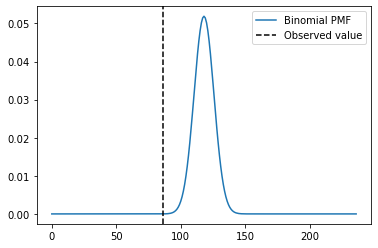

In [20]:
k = np.arange(0, 237)
pmf = binom.pmf(k, p=0.5, n=236)

plt.plot(k, pmf, label='Binomial PMF')
plt.axvline(x=86, label='Observed value', linestyle='--', color='black')
plt.legend()
plt.show()

In [8]:
num_of_opinion_change = 236
n = 1500

obs_stat = 150-86

stat_arr = np.zeros(n)

for i in range(n):
    n12 = binom.rvs(p=0.5, n=236)
    n21 = num_of_opinion_change - n12
    
    stat = n12-n21
    stat_arr[i] = stat

In [11]:
def plot_hist(ax, arr, obs_val, bins=16):
    vals, edges = np.histogram(arr, bins=bins)
    ax.hist(arr, bins=edges, edgecolor='w')

    ax.set_xticks(edges)
    ax.set_xticklabels(labels=list(map(lambda x: '{:.2f}'.format(x), edges)), rotation=45)
    ax.axvline(x=obs_val, linestyle='--', color='black', label='Observed value')

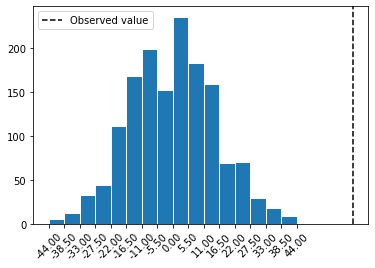

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_hist(ax, stat_arr, obs_stat, bins=16)
ax.legend()
plt.show()